In [1]:
import pandas as pd

In [3]:
import numpy as np

In [5]:
import tensorflow as tf

In [15]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [29]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [56]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [94]:
from sklearn.model_selection import train_test_split

In [84]:
from tensorflow.keras import Sequential

In [86]:
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D

In [9]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")
df

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business
...,...,...,...,...,...,...,...,...
3495,etfdailynews,MarketBeat News,"Arrow Electronics, Inc. (NYSE:ARW) Shares Purc...",QRG Capital Management Inc. increased its stak...,https://www.etfdailynews.com/2024/07/18/arrow-...,2024-07-18T14:36:45+00:00,positive,Technology
3496,etfdailynews,MarketBeat News,"3,120 Shares in NICE Ltd. (NASDAQ:NICE) Bought...",QRG Capital Management Inc. bought a new posit...,https://www.etfdailynews.com/2024/07/18/3120-s...,2024-07-18T14:36:44+00:00,positive,Technology
3497,etfdailynews,MarketBeat News,"QRG Capital Management Inc. Has $857,000 Stock...",QRG Capital Management Inc. boosted its stake ...,https://www.etfdailynews.com/2024/07/18/qrg-ca...,2024-07-18T14:36:43+00:00,positive,Technology
3498,finanznachrichten,NaN,Biotechnology Market: Surging Investments and ...,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",https://www.finanznachrichten.de/nachrichten-2...,2024-07-18T14:36:00+00:00,neutral,Technology


In [13]:
news_df = df[ ["Description", "Type"] ]
news_df

,Description,Type
0,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",Business
1,"Harare, Zimbabwe – Local businesses are grappl...",Business
2,(marketscreener.com) Billionaire Elon Musk has...,Business
3,(marketscreener.com) A U.S. trade regulator on...,Business
4,4.5 million households in the U.S. have solar ...,Business
...,...,...
3495,QRG Capital Management Inc. increased its stak...,Technology
3496,QRG Capital Management Inc. bought a new posit...,Technology
3497,QRG Capital Management Inc. boosted its stake ...,Technology
3498,"WESTFORD, Mass., July 18, 2024 /PRNewswire/ --...",Technology


In [17]:
tokenizer = Tokenizer( num_words = 1000 )

In [19]:
tokenizer.fit_on_texts( news_df["Description"] )

In [31]:
sequences = tokenizer.texts_to_sequences( news_df["Description"] )

In [33]:
max_palavras = 0
for sequence in sequences:
    if len(sequence) > max_palavras:
        max_palavras = len(sequence)
max_palavras        

80

In [96]:
sequences_padded = pad_sequences( sequences, padding="post" )
X = sequences_padded
X

array([[598, 117,   5, ...,   0,   0,   0],
       [211, 373, 212, ...,   0,   0,   0],
       [ 28,  22,  26, ...,   0,   0,   0],
       ...,
       [216, 231,  36, ...,   0,   0,   0],
       [933,  31,  96, ...,   0,   0,   0],
       [216, 231,  36, ...,   0,   0,   0]])

Business =>  [0, 0, 0, 1] 
Technology => [0, 0, 1, 0]
Processamento => [ 0.002, 0.004, 0.9987, 0.002]

In [98]:
label_encoder = LabelEncoder()

In [102]:
class_encoded = label_encoder.fit_transform( news_df["Type"] )
class_encoded.shape

(3500,)

In [104]:
# [[0], [0], [0], ..., [6], [6], [6]]
class_encoded_2d = class_encoded.reshape( class_encoded.shape[0], 1 )

In [106]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

In [108]:
Y = one_hot_encoder.fit_transform( class_encoded_2d )
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [110]:
Y.shape

(3500, 7)

In [144]:
modelo = Sequential()
modelo.add( Embedding( input_dim=1000, output_dim=128 ))
modelo.add( GlobalAveragePooling1D() )
modelo.add( Dense( 128, activation="relu") )
modelo.add( Dense( 7, activation="softmax") )
modelo.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [158]:
modelo.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [160]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=150)

In [162]:
history_fit = modelo.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9390 - loss: 0.1479
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9517 - loss: 0.1103
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9500 - loss: 0.1119
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9514 - loss: 0.1232
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9542 - loss: 0.1037
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9531 - loss: 0.1038
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9594 - loss: 0.0994
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9518 - loss: 0.0882
Epoch 9/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9512 - loss: 0.0979
Epoch 10/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9545 - loss: 0.0887
Epoch 11/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9661 - loss: 0.0793
Epoch 12/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9615 - lo

In [166]:
history_fit.history

{'accuracy': [0.9440000057220459,
  0.9554286003112793,
  0.9531428813934326,
  0.9489523768424988,
  0.9527618885040283,
  0.9561904668807983,
  0.9561904668807983,
  0.9508571624755859,
  0.9497143030166626,
  0.955047607421875,
  0.9603809714317322,
  0.9588571190834045,
  0.9626666903495789,
  0.9588571190834045,
  0.9577142596244812,
  0.9592381119728088,
  0.9588571190834045,
  0.9558095335960388,
  0.9565714001655579,
  0.9615238308906555],
 'loss': [0.13270774483680725,
  0.10650815814733505,
  0.10637135058641434,
  0.12741129100322723,
  0.10967208445072174,
  0.09738529473543167,
  0.10456728935241699,
  0.09491871297359467,
  0.10467556864023209,
  0.0911480113863945,
  0.08457796275615692,
  0.08868052810430527,
  0.08882089704275131,
  0.09844297915697098,
  0.09071151167154312,
  0.0851958617568016,
  0.08566555380821228,
  0.08879466354846954,
  0.09130117297172546,
  0.0822903960943222]}

In [168]:
import matplotlib.pyplot as plt

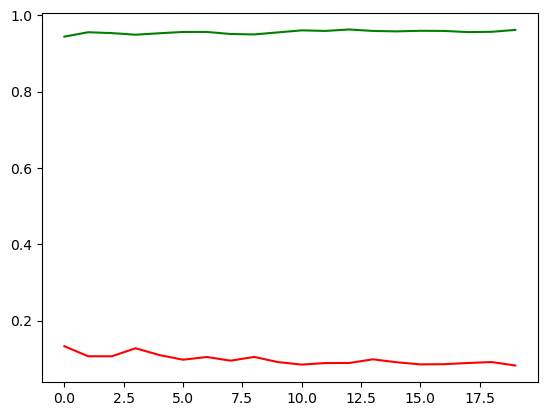

In [172]:
plt.plot(history_fit.history["accuracy"], color="green")
plt.plot(history_fit.history["loss"], color="red")
plt.show()

In [178]:
texto = "IBM sell stock options"
... 
resultado = modelo.predict( [ pad_sequences_texto_a_ser_avaliado] ) 
label_encoder.inverse_transform( resultado  ) 

ValueError: y contains previously unseen labels: 'IBM sell stock options'